## OpenCV
參考: 
1. OpenCV圖片處理整理 (緩慢更新): https://lufor129.medium.com/opencv%E5%9C%96%E7%89%87%E8%99%95%E7%90%86%E6%95%B4%E7%90%86-%E7%B7%A9%E6%85%A2%E6%9B%B4%E6%96%B0-b45e248d14bb
2. https://www.kaggle.com/shivamanhar/computer-vision

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [18]:
test_path = "../input/open-images-2019-object-detection/test/"
filename = "000172d1dd1adce0.jpg"
img_path = test_path + filename
img = cv2.imread(img_path)

(682, 1024, 3)


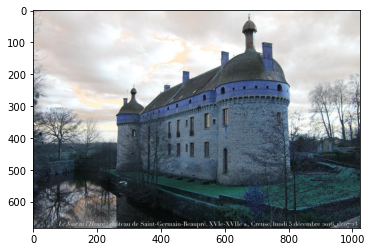

In [20]:
print(img.shape)
plt.imshow(img)
plt.show()

(682, 1024, 3)


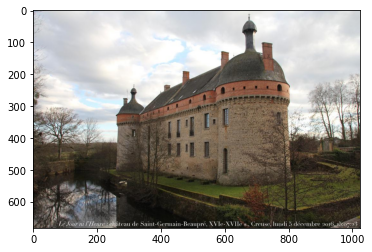

In [21]:
# 轉換成RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img_rgb.shape)
plt.imshow(img_rgb)
plt.show()

(682, 1024)


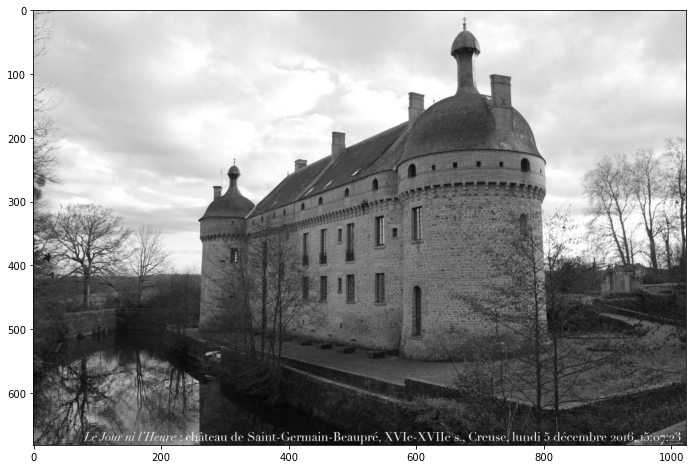

In [48]:
# Convert the image into gray scale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
plt.figure(figsize=(16, 8))
plt.imshow(img_gray, cmap = 'gray')
plt.show()

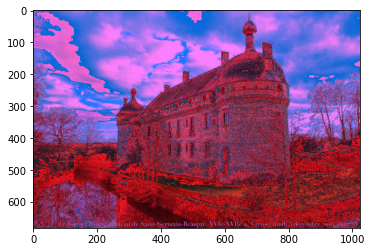

In [22]:
img_copy = np.copy(img_rgb)
img_copy[:,:,0] = 5*img_copy[:,:,0]
img_copy[:,:,1] = img_copy[:,:,1]/2 

plt.imshow(img_copy)
plt.show()

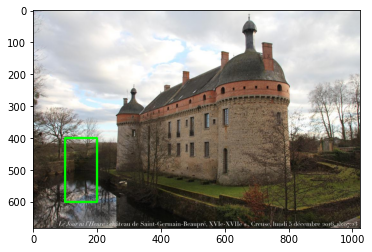

In [23]:
# 添加長方形bounding box
img_copy2 = np.copy(img_rgb)
cv2.rectangle(img_copy2, pt1=(100,400), pt2=(200, 600), color=(0, 255,0), thickness=5)
plt.imshow(img_copy2)
plt.show()

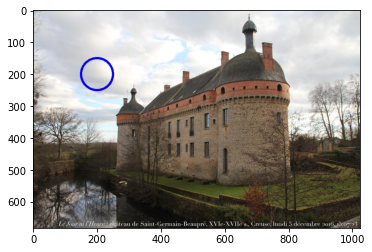

In [24]:
img_copy3 = np.copy(img_rgb)
cv2.circle(img_copy3, center=(200, 200), radius=50, thickness=5, color=(0, 0, 255))
plt.imshow(img_copy3)
plt.show()

### ravel()、flatten()、squeeze()

numpy中的ravel()、flatten()、squeeze()都有将多维数组转换为一维数组的功能，区别：

- ravel()：如果没有必要，不会产生源数据的副本
- flatten()：返回源数据的副本
- squeeze()：只能对维数为1的维度降维

reshape(-1)也可以“拉平”多维数组

(698368,)


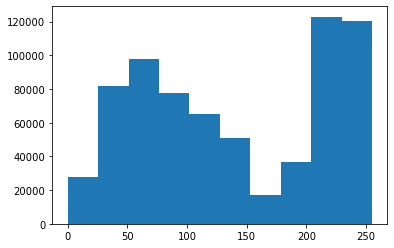

In [31]:
first_row = img_copy3[:,:,0].ravel()  #拉平 

plt.hist(first_row)
print(first_row.shape) # 682x1024

### cv2.blur

- 平均濾波 Averaging：使用 opencv 的 cv2.blur 或 cv2.boxFilter
- 高斯濾波 Gaussian Filtering：使用 opencv 的 cv2.GaussianBlur
- 中值濾波 Median Filtering：使用 opencv 的 cv2.medianBlur
- 雙邊濾波 Bilateral Filtering：使用 opencv 的 cv2.bilateralFilter

#### Averaging blurring 平均模糊
又稱為Normalized Box Filter，這是最簡單的一種模糊化方法，首先，我們選擇一個總pixel數為奇數，KxK大小的方形window，然後從左至右、由上而下的走過整張圖片，每個此window所在的最中央的那個點，我們把它調整為window內所有其它點的平均值，如此，當KxK的window走過整張圖片後，就完成了整張圖片的Averaging模糊化
![Python 與 OpenCV – 模糊處理](https://chtseng.files.wordpress.com/2016/11/2657_1ysl7xafja.png?w=1140)

from: https://chtseng.wordpress.com/2016/11/17/python-%E8%88%87-opencv-%E6%A8%A1%E7%B3%8A%E8%99%95%E7%90%86/

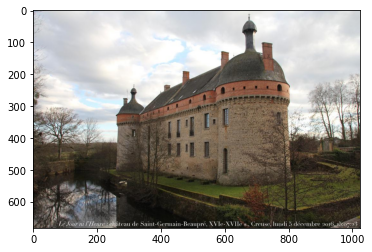

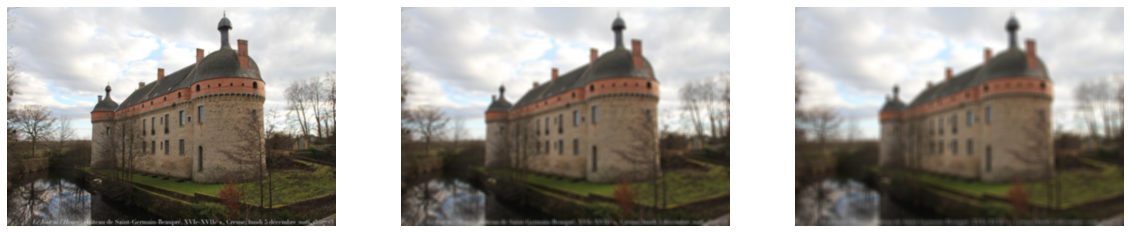

In [33]:
# 平滑模糊化
img_copy5 = np.copy(img_rgb)
kernels = [5, 11, 17]  # 越大越模糊

plt.imshow(img_copy5)
plt.show()

fig, axs = plt.subplots(nrows= 1, ncols=3, figsize=(20,20))
for ind, s in enumerate(kernels):
    img_blurred = cv2.blur(img_copy5, ksize=(s,s))
    ax = axs[ind]
    ax.imshow(img_blurred)
    ax.axis('off')
plt.show()

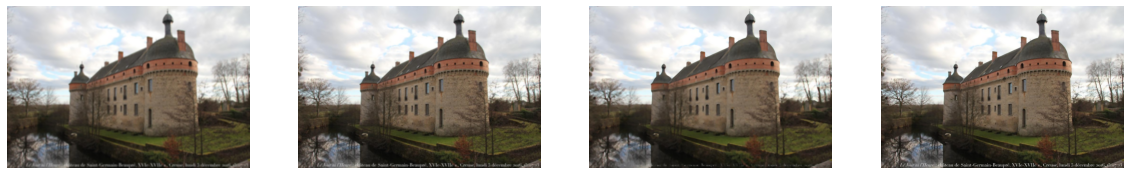

In [34]:
img_0 = cv2.blur(img_rgb, ksize=(7,7))
img_1 = cv2.GaussianBlur(img_rgb, ksize=(7,7), sigmaX=0)
img_2 = cv2.medianBlur(img_rgb, 7)
img_3 = cv2.bilateralFilter(img_rgb, 7, sigmaSpace=75, sigmaColor=75)

images = [img_0, img_1, img_2, img_3]
fig, axs = plt.subplots(nrows =1, ncols =4, figsize=(20,20))

for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p)
    ax.axis('off')
    
plt.show()

### cv2.threshold

畫素高於閾值時,給畫素賦予新值,否則,賦予另外一種顏色。

```
cv2.threshold(src,thresh,maxval,type[,dst])->retval,dst
```

作用:用於獲取二元值的灰度影象

cv2.threshold()有四個參數，第一個原圖像，第二個進行分類的閾值，第三個是高於（低於）閾值時賦予的新值，第四個是一個方法選擇參數，常用的有：
* cv2.THRESH_BINARY（黑白二值）
* cv2.THRESH_BINARY_INV（黑白二值反轉）
* cv2.THRESH_TRUNC （得到的圖像為多像素值）
* cv2.THRESH_TOZERO
* cv2.THRESH_TOZERO_INV

該函數有兩個返回值: 
* 第一個retVal（得到的閾值值）
* 第二個就是閾值化後的圖像

![Python下opencv使用筆記（四）](https://img-blog.csdn.net/20150709085751112)

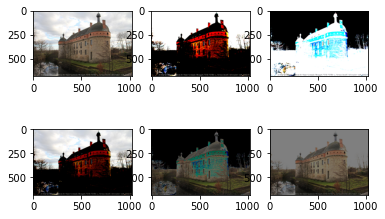

In [38]:
# 將深度大於127的像素轉成最大灰階值255，深度小於127的像素則轉成0，只餘255和0兩色。
_, thresh_0 = cv2.threshold(img_rgb, 127, 255, cv2.THRESH_BINARY) # 黑白轉換
_, thresh_1 = cv2.threshold(img_rgb, 127, 255, cv2.THRESH_BINARY_INV) # 白黑轉換
_, thresh_2 = cv2.threshold(img_rgb, 127, 255, cv2.THRESH_TOZERO) # 將小於門檻值的灰階值設為0，大於門檻值的值保持不變
_, thresh_3 = cv2.threshold(img_rgb, 127, 255, cv2.THRESH_TOZERO_INV) # 將大於門檻值的灰階值設為0，小於門檻值的值保持不變
_, thresh_4 = cv2.threshold(img_rgb, 127, 255, cv2.THRESH_TRUNC) # 將大於門檻值的灰階值設為門檻值，小於門檻值的值保持不變

images = [img_rgb, thresh_0, thresh_1, thresh_2, thresh_3, thresh_4]

fig, axs = plt.subplots(nrows= 2, ncols=3)

for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.imshow(p)
    
plt.show()

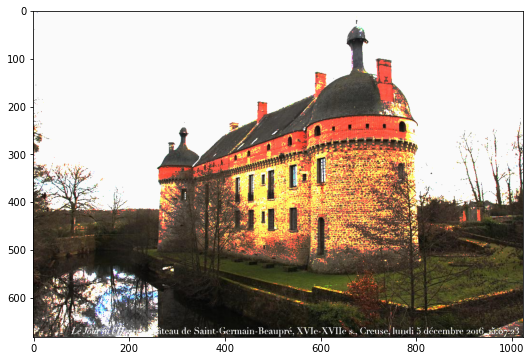

In [43]:
# 將相速大於110者直接變成255
index_210 = img_rgb > 110

# print(index_210)
# [[[ True  True  True]
#   [ True  True  True]
#   [ True  True  True]...

img_copy6 = np.copy(img_rgb)
img_copy6[index_210] = 250
plt.figure(figsize=(16,6))
plt.imshow(img_copy6)
plt.show()

(132, 1024, 3)


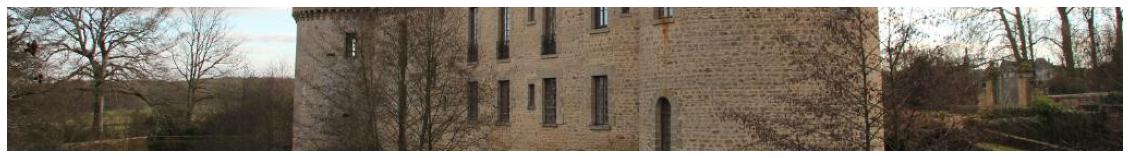

In [44]:
small_img = np.copy(img_rgb)
small_img = small_img[350:-200:]
print(small_img.shape)

plt.figure(figsize=(20,20))
plt.imshow(small_img)
plt.axis('off')
plt.show()

### Canny邊緣檢測(Canny edge detector)應用說明
```
edges = cv2.Canny(gray, low_threshold, high_threshold)
```

在這種情況下，Canny應用係輸入名為gray之灰階圖像，輸出將是另一個稱為edges圖像。

而low_threshold和high_threshold代表邊緣檢測的門檻值。

此演算法係澳洲計算機科學家約翰·坎尼（John F. Canny）開發出來的一個多級邊緣檢測算法，首先檢測高閾值以上的強邊緣（強梯度）像素，並拒絕低於閾值的像素。接著，只要它們連接到強邊緣，就會包含值為low_threshold和high_threshold的像素。輸出邊緣是二進制圖像，其中白色像素描繪出檢測到之邊緣，而其他地方則為黑色。

該範圍意味著衍生值（如素與像素之間的值差異）將在數十或數百的範圍內。因此，門檻值參數的合理範圍也將在數十到數百之間。
針對low_threshold與high_threshold的門檻值，John Canny原演算法提出者建議低到高比率為1：2或1：3。

在運行Canny檢測邊緣之前，我們需進行高斯平滑處理，是一種通過平均來抑制干擾和虛假漸變的方法(cv2.GaussianBlur)。 

實際上cv2.Canny（）本身這函式處理內部已有應用高斯平滑方法，你也可以透過其他進一步的平滑方法來獲得不同的結果。

在這兒我們可選擇高斯平滑的kernel_size為任何奇數。kernel_size值較大意味著在更大的區域上進行平均或平滑

from: https://ithelp.ithome.com.tw/articles/10202295

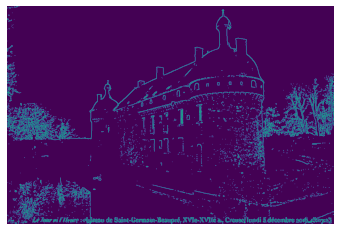

In [47]:
# Canny邊緣檢測(Canny edge detector)
edges = cv2.Canny(image= img_rgb, threshold1=250, threshold2=250)
edges[100:,:,]
plt.figure()
plt.imshow(edges)
plt.axis('off')
plt.show()

### cv2.CascadeClassifier
https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html

使用基於Haar feature-based cascade classifiers 進行Object Detection是從Paul Viola和Michael Jones在2001的論文“"Rapid Object Detection using a Boosted Cascade of Simple Features”。

這是一種基於機器學習的方法，其中從許多正負圖像(trained from a lot of positive and negative images)中訓練cascade function。

在此進行人臉辨識:
第一步: 該算法需要大量positive images（面部圖像）和negative images（無面部圖像）來訓練分類器。 

然後從中提取特徵，為此使用Haar features(下方解釋)，就像convolutional kernel一樣，每個特徵都是通過黑色矩形下的像素總和-白色矩形下的像素總和而獲得的單個值。( Each feature is a single value obtained by subtracting sum of pixels under the white rectangle from sum of pixels under the black rectangle.)

現在，每個kernel的所有可能大小和位置都用於計算features（試想一下這樣需要多少計算？即使是24x24的window也會產生超過160000個特徵）

對於每個特徵計算，我們需要找到白色和黑色矩形下的像素總和，為了解決這個問題，他們引入了整體形象。無論圖像有多大，它都會將給定像素的計算減少到僅涉及四個像素的操作。

但是在計算的所有 features中，大多數都不相關。

例如下圖，第一行的兩個features都是對的:
![](https://docs.opencv.org/3.4/haar.png)
第一個特徵似乎著眼於眼睛的區域通常比鼻子和臉頰的區域更暗的屬性。

第二個功能取決於眼睛比鼻子的鼻樑更黑的屬性。

但是相同的窗口應用於臉頰或其他任何地方都是沒用的，那要如何從160000多個功能中選擇最佳功能？ **Adaboost!!**

為此，我們將所有feature apply到所有training images，每個特徵會找到最佳的閾值，該閾值會將人臉分為positive and negative。

一定會有會有錯誤或分類錯誤，我們選擇**錯誤率最低的特徵，意味著它們是對人臉和非人臉圖像進行最準確分類的特徵。**（此過程不簡單，在開始時，每個圖像的權重均相等，在每次分類後，錯誤分類的圖像的權重都會增加，然後重複執行，計算新的錯誤率。還要計算新的權重。繼續進行此過程，直到達到所需的精度或錯誤率或找到所需的features數量為止 --> gradient descend)

最終分類器是這些弱分類器(weak classifiers)的weighted sum。

之所以稱其為weak classifiers是因為它本身無法對圖像進行分類，而是與其他圖像一起構成了強大的分類器。

該論文說，甚至200個features都可以提供95％的準確度檢測。

他們的最終設置具有大約6000個features（從160000多個減少到6000個features!!!）

因此，現在有一張照片，取每個24x24 window，apply 6000個features，然後檢查是否有人臉，這樣效率極差!!

因為圖像中大多數圖像是非臉部區域。因此必須先有一個方法來檢查wimdow是否不是face region，如果不是就直接捨棄，這樣就不用跑6000次。

paper位置: https://link.springer.com/content/pdf/10.1023/B:VISI.0000013087.49260.fb.pdf

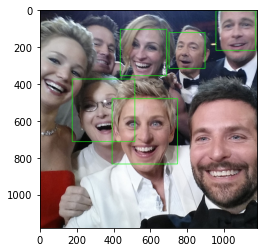

In [58]:
def detectFace(img):
    filename = img.split(".")[0] # 取得檔案名稱(不添加副檔名)
    img = cv2.imread(img) # 讀取圖檔
    grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 透過轉換函式轉為灰階影像
    color = (0, 255, 0)  # 定義框的顏色
    
    # OpenCV 人臉識別分類器
    face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    
    # 眼睛辨識器
    #eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    
    # 調用偵測識別人臉函式
    faceRects = face_classifier.detectMultiScale(
        grayImg, scaleFactor=1.2, minNeighbors=3, minSize=(32, 32))
    
    # 大於 0 則檢測到人臉
    if len(faceRects):  
        # 框出每一張人臉
        for faceRect in faceRects: 
            x, y, w, h = faceRect
            cv2.rectangle(img, (x, y), (x + h, y + w), color, 2)
    
    # 將結果圖片輸出
    cv2.imwrite(filename + "_face.jpg", img)
    
    img_read = cv2.imread('./_face.jpg')
    face_output = cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB)
    plt.imshow(face_output)
    plt.show()
    
detectFace('../input/selfie/selfie.jpg')